$${\color{yellow}{\text{Applied Linear Algebra: Vectors and Matrices}}}$$



---

Restart the session after executing the following cell

---

In [1]:
!pip install gensim

In [2]:
!pip install yfinance --quiet

---

Load essential libraries

---

In [3]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import nltk
#import gensim.downloader
from nltk.tokenize import word_tokenize
import yfinance as yf
import seaborn as sns

---

Mount Google Drive folder if running Google Colab

---

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/ALA'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = '../Data/'

---

**We will now use Pytorch to create tensors**

The patient data matrix:

![patient data matrix](https://1drv.ms/i/s!AjTcbXuSD3I3hsxIkL4V93-CGq8RkQ?embed=1&width=1000)

**Notation**:

Zeroth patient vector $\mathbf{x}^{(0)}= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}$ and zeroth feature (heart rate vector) $\mathbf{x}_0 = \begin{bmatrix}72\\85\\68\\90\\84\\78\end{bmatrix}.$

---



In [ ]:
## Create a patient data matrix as a constant tensor
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                  [85, 130, 37.0, 110, 14],
                  [68, 110, 38.5, 125, 34],
                  [90, 140, 38.0, 130, 26],
                  [84, 132, 38.3, 146, 30],
                  [78, 128, 37.2, 102, 12]])
print(X)
print(X.shape)
print(type(X))
print(X[0]) # this is patient-0 information which is a rank-1 tensor
print(X[0, :]) # patient-0 all features
print('------------')
print(X[0, 2]) # feature-2 of patient-0, temperature of patient-0
print(X[:, 2]) # feature-2 of all patients, temperature of all patients

tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]])
torch.Size([6, 5])
<class 'torch.Tensor'>
tensor([ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000])
tensor([ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000])
------------
tensor(37.3000)
tensor([37.3000, 37.0000, 38.5000, 38.0000, 38.3000, 37.2000])


---

**Convert a PyTorch object into a numpy array**

---

In [ ]:
print(X.numpy())
print(type(X.numpy()))

---

**Addition and subtraction of vectors, scalar multiplication (apply operation componentwise)**

![vector addition](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NokBAAAAAZLAaAoWwhtn8Vk26NotALo?width=256)

![vector subtracton](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3M4kBAAAAAU_n_mAEv006QFZm_sUj2Dc?width=256)

![vector multiplication](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NIkBAAAAAa_qL04bLT4kWoNeHcrR9LQ?width=256)

![vector geometry1](https://1drv.ms/i/c/37720f927b6ddc34/IQSGNMr5z3SSRry7LSKL7LybAcGYuzgw5smabV8-6DudXIs?width=230)

![vector geometry2](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=192)


---

In [ ]:
# Vector addition
print(X[1, :] + X[2, :])

# Vector subtraction
print(X[1, :] - X[2, :])

# Scalar-vector multiplication
print(X[:, 2])
print((9/5)*X[:, 2]+32) # 0peration not defined in pen & paper but in computation is referred to as
# broadcasting

# Average patient
x_avg = (1/6)*(X[0, :] + X[1, :] + X[2, :] + X[3, :] + X[4, :] + X[5, :])
x_avg = torch.mean(X, dim = 0) # dim = 0 means top-to-bottom or along dim-0

# Another broadcasting example
print(X)
print(x_avg)
print(X - x_avg)

---

Application of vector subtraction in natural language processing (NLP): download the word embedding model trained on Wikipedia articles.

---

In [ ]:
model = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


---

Now we will see what embedding vector comes as a result of applying the model for the words *cricket* and *football*.

Next, we will do an *intuitive* subtraction of word embeddings as in

1. Cricket without Tendulkar
2. Football without Messi

Note that the embedding vectors have 50 components corresponding to the 50-dimensional embedding of model suggested by the name '**glove-wiki-gigaword-50**'

---

In [ ]:
# Cricket without Tendulkar
a = model['cricket'] - model['tendulkar']

# Football without Messi
b = model['football'] - model['messi']
print(a)
print(b)

# How different is cricket-without-tendulkar from
# football-without-messi?
print(a-b)

[-0.7716      0.41267997 -1.725968   -0.10445005 -1.1475699  -0.854661
 -1.089      -0.08342999  0.62349    -1.67822    -0.2488078  -0.49199998
  0.18756002 -1.67098     0.6117872   0.42784432  1.05656     0.91583097
 -0.03299999 -0.04422501  0.200326   -0.33737004  0.31068     1.37842
 -1.13689    -0.57445    -0.70685995  0.41552    -0.28937     0.54485
  1.0492998   0.62732    -0.8105     -1.27723    -0.02612001  0.53963
 -0.14065999 -0.738244   -0.30487    -1.18129     0.05651999 -0.993618
 -0.911399   -0.09289992  0.535432    0.26259995 -0.63031     0.64473
  0.77843     0.15099996]
[-2.06898     0.66804904 -1.077512    0.79964995 -0.27109998 -0.26289004
 -0.881       0.377503   -0.10869002 -2.47329    -0.23453003 -0.58438
  0.10404003 -0.52671003 -0.03030002  0.237764    0.19168997  1.60344
 -0.42980003  0.59058     0.59800005 -0.67075     0.45888     1.4538
 -1.15642    -1.63534    -1.1248189  -0.20879    -0.00812     0.25545004
  1.92044     0.30049008  0.19949001 -0.675167   -0

---

Understanding pen & paper versions of tensors w.r.t. their representations in the code

---

In [ ]:
# Pen & paper: 3-vector, Code: rank-1 tensor
a_vector = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
print(a_vector)
print(a_vector.shape)
print('-------')
# Pen & paper: 1x3-matrix, Code: rank-2 tensor
a_matrix_version1 = torch.tensor([[1.0, 2.0, 3.0]], dtype = torch.float64)
print(a_matrix_version1)
print(a_matrix_version1.shape)
# Pen & paper: 3x1-matrix, Code: rank-2 tensor
a_matrix_version2 = torch.tensor([[1.0], [2.0], [3.0]], dtype = torch.float64)
print(a_matrix_version2)
print(a_matrix_version2.shape)

tensor([1., 2., 3.], dtype=torch.float64)
torch.Size([3])
-------
tensor([[1., 2., 3.]], dtype=torch.float64)
torch.Size([1, 3])
tensor([[1.],
        [2.],
        [3.]], dtype=torch.float64)
torch.Size([3, 1])


---

A tensor of rank 3 corresponding to 4 time stamps (hourly), 3 samples (patients), 2 features (HR and BP). Assume that admission time is 9AM.

---

In [ ]:
# A rank-3 patient tensor with shape (4, 3, 2)
# with meaning for
# dim-0 as 4 hourly timestamps,
# dim-1 as 3 patients, and
# dim-2 as 2 features (HR and BP)
# T = torch.tensor([[[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]]])
T = torch.tensor([[[74., 128], [79, 116], [71, 116]],
                 [[78, 118], [82, 124], [72, 128]],
                 [[84, 138], [84, 130], [74, 120]],
                 [[82, 126], [76, 156], [82, 132]]])
print(T)

tensor([[[ 74., 128.],
         [ 79., 116.],
         [ 71., 116.]],

        [[ 78., 118.],
         [ 82., 124.],
         [ 72., 128.]],

        [[ 84., 138.],
         [ 84., 130.],
         [ 74., 120.]],

        [[ 82., 126.],
         [ 76., 156.],
         [ 82., 132.]]])


---

**Accessing elements of a tensor**

---

In [ ]:
## Accessing elements of a tensor
# Rank-3 tensor T has axes order (timestamps, patients, features)

# Element of T at postion 3 w.r.t. dim-0, position 2 w.r.t. dim-1,
# position-1 w.r.t dim-2
print(T[3, 2, 1]) # BP of patient-2 at noon


# Element-0 of object T which is also the info for all patients at
# admission time 9AM
print(T[0]) # patients' info at admission time
print(T[-1]) # first element of T from the tail, patients' info at noon


# Patient-2 info at noon
T[-1, 2]


tensor(132.)
tensor([[ 74., 128.],
        [ 79., 116.],
        [ 71., 116.]])
tensor([[ 82., 126.],
        [ 76., 156.],
        [ 82., 132.]])


tensor([ 82., 132.])

---

Understanding shapes

---

In [ ]:
#a = torch.tensor([1.0, 2.0, 3.0])
#a = torch.tensor([[1.0, 2.0, 3.0]])
a = torch.tensor([[[1.0, 2.0, 3.0]]])
print(a)
print(a.shape)

tensor([[[1., 2., 3.]]])
torch.Size([1, 1, 3])


---

**Broadcasting**

---

In [ ]:
# A simple broadcasting example
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0])
print(a.shape)
print(b.shape)
print(a-b)

torch.Size([3])
torch.Size([1])
tensor([-3., -2., -1.])


In [ ]:
# How to add a new axis to a tensor using the unsqueeze() function
#print(T)
#print(T.shape)
T_patient0 = T[:, 0, :]
print(T_patient0)
print(T_patient0.shape)
print('---------')
T_patient0_new = torch.unsqueeze(T_patient0, 1)
print(T_patient0_new)
print(T_patient0_new.shape)
print('---------')
print(T)
print(T.shape)

tensor([[ 74., 128.],
        [ 78., 118.],
        [ 84., 138.],
        [ 82., 126.]])
torch.Size([4, 2])
---------
tensor([[[ 74., 128.]],

        [[ 78., 118.]],

        [[ 84., 138.]],

        [[ 82., 126.]]])
torch.Size([4, 1, 2])
---------
tensor([[[ 74., 128.],
         [ 79., 116.],
         [ 71., 116.]],

        [[ 78., 118.],
         [ 82., 124.],
         [ 72., 128.]],

        [[ 84., 138.],
         [ 84., 130.],
         [ 74., 120.]],

        [[ 82., 126.],
         [ 76., 156.],
         [ 82., 132.]]])
torch.Size([4, 3, 2])


In [ ]:
# How different are the patients from patient-0?
#T - T_patient0 # does not work for broadcasting
#T - T_patient0

# How different are the patients compared to their time at admission
T-T_patient0_new

tensor([[[  0.,   0.],
         [  5., -12.],
         [ -3., -12.]],

        [[  0.,   0.],
         [  4.,   6.],
         [ -6.,  10.]],

        [[  0.,   0.],
         [  0.,  -8.],
         [-10., -18.]],

        [[  0.,   0.],
         [ -6.,  30.],
         [  0.,   6.]]])

---

**Exercise**: interpret $\texttt{T[:, -1, :]}$

---

In [ ]:
# Last patient's info at all timestamps
T[:, -1, :]

tensor([[ 71., 116.],
        [ 72., 128.],
        [ 74., 120.],
        [ 82., 132.]])

---

Broadcasting exercise

---

In [ ]:
T = torch.randint(-5, 6, (4, 5, 3))
print(T)
v = torch.tensor([1.0, 2.0, 3.0])
print(v)

tensor([[[-5,  3,  5],
         [ 0,  1,  5],
         [-2, -1,  1],
         [ 1, -5,  3],
         [ 3, -1,  1]],

        [[ 2, -1,  3],
         [-4, -5, -3],
         [ 3, -1, -5],
         [ 5,  4, -3],
         [-1, -3, -2]],

        [[-5, -5,  1],
         [ 4, -3, -5],
         [ 3, -4,  5],
         [-2,  2,  0],
         [ 2,  1,  5]],

        [[ 5, -3, -3],
         [ 2,  5,  1],
         [-4, -1, -3],
         [ 3,  3, -3],
         [-3,  4,  3]]])
tensor([1., 2., 3.])


---

$l_2$ norm or the geometric length of a vector denoted as $\lVert \mathbf{a}\rVert$ tells us how long a vector is. In 2-dimensions, $$\mathbf{a}=\begin{bmatrix}a_1\\a_2\end{bmatrix}\Rightarrow \lVert\mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2}$$ and in $n$-dimensions, $$\mathbf{a}=\begin{bmatrix}a_1\\a_2\\\vdots\\a_n\end{bmatrix}\Rightarrow\lVert \mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2+\cdots+a_n^2}.$$

![vector norm](https://1drv.ms/i/c/37720f927b6ddc34/IQT817WmpQjlRqZ1R0d5Cfv6AUW6c4robL-gk06i9wmCaFU?width=500)

---

In [ ]:
## l2 norm of a vector
x = torch.tensor([76.0, 124.0], dtype = torch.float64)
print(x)
torch.norm(x)

tensor([ 76., 124.], dtype=torch.float64)


tensor(145.4373, dtype=torch.float64)


---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$\mathbf{a}{\color{cyan}\cdot}\mathbf{b} = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.


---

In [ ]:
## Dot product of vectors
a = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
b = torch.tensor([4.0, 5.0, 6.0], dtype = torch.float64)
torch.dot(a, b)

tensor(32., dtype=torch.float64)

---

The dot product is a measure of similarity between vectors (or, how aligned they are geometrically).

![dot product](https://1drv.ms/i/c/37720f927b6ddc34/IQTbcGSjdbhSTJ7J39d5BCWAAWS6-y5U6J87vHuDWeAqGwM?width=6000)
---

In [ ]:
a = torch.tensor([1.0, 2.0])
b = torch.tensor([2.0, 4.0])
c = torch.tensor([-2.0, 1.0])
d = torch.tensor([-1.0, -2.0])
print(torch.dot(a, b))
print(torch.dot(a, c))
print(torch.dot(a, d))

tensor(10.)
tensor(0.)
tensor(-5.)


---

Cauchy-Schwarz inequality $-1\leq\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\leq1.$

This is a normalized measure of similarity (or extent of alignment) between vectors.

Angle between vectors $\mathbf{x}$ and $\mathbf{y} = \cos^{-1}\left(\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\right).$

![angle](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=400)


---

In [ ]:
x = torch.tensor([1.0, 2.0])
y = torch.tensor([2.0, 1.0])

# Linear difference between x and y
print(torch.norm(x - y))

# Angle difference between x and y in radians
print(torch.acos(torch.dot(x,y) / (torch.norm(x) * torch.norm(y))))

# Angle difference between x and y in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(x,y) / (torch.norm(x) * torch.norm(y)))))

tensor(1.4142)
tensor(0.6435)
tensor(36.8699)


---

Application of the Cauchy-Schwarz inequality: is "Cricket without Tendulkar" same as "Football without Messi"?

---

In [ ]:
a = torch.tensor(model['cricket'] - model['tendulkar'], dtype = torch.float64)
b = torch.tensor(model['football'] - model['messi'], dtype = torch.float64)

# Linear difference between and a and b
print(torch.norm(a-b))

# Angle difference between a and b in radians
print(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b))))

# Angle difference between a and b in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b)))))

tensor(4.2349, dtype=torch.float64)
tensor(0.7420, dtype=torch.float64)
tensor(42.5126, dtype=torch.float64)


In [ ]:
c = torch.tensor(model['soup'] - model['salt'], dtype = torch.float64)

# Angle difference between a and b in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b)))))

# Angle difference between a and c in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, c) / (torch.norm(a) * torch.norm(c)))))

# cricket-without-tendulkar has approximately the same similarity w.r.t.
# football-without-messi and tennis-without-federer

tensor(42.5126, dtype=torch.float64)
tensor(103.5210, dtype=torch.float64)



---

**Hadamard Product of Vectors**

A vector resulting from an elementwise multiplication: $$\mathbf{a}{\color{cyan}\otimes}\mathbf{b} = \begin{bmatrix}{\color{red}{a_1\times b_1}}\\{\color{green}{a_2\times b_2}}\\\vdots\\{\color{magenta}{a_n\times b_n}}\end{bmatrix}.$$

The <font color="cyan">$\otimes$</font> represents the computation of the Hadamard product.

---

In [ ]:
## Hadamard product
a = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
b = torch.tensor([4.0, 5.0, 6.0], dtype = torch.float64)

# Element-wise multiplication (Hadamard product)
print(a*b)
print(torch.mul(a, b))

tensor([ 4., 10., 18.], dtype=torch.float64)
tensor([ 4., 10., 18.], dtype=torch.float64)


---

A matrix-vector product is simply a sequence of dot products of the rows of the matrix (seen as vectors) with the vector

![matvec product](https://1drv.ms/i/c/37720f927b6ddc34/IQQ1cQ8fZdFmS4cnGkBlsZbAAaL2zMtzWdjHe-HCMt4UTA0?width=700)

---

In [ ]:
## Matrix-vector product
A = torch.tensor([[1.0, 2.0, 4.0],
                  [2.0, -1.0, 3.0]])
x = torch.tensor([4.0, 2.0, -2.0])

# Matrix-vector multiplication
print(torch.matmul(A, x))

tensor([0., 0.])


---

Here we create a simple sentence in English and tokenize it

---

In [ ]:
sentence = 'i swam quickly across the river to get to the other bank'
nltk.download('punkt_tab')


---

Generate the word embeddings for the tokens and store them in a matrix $\mathbf{X}$ such that each row of the matrix corresponds to a token.

---

---

A matrix-matrix product is simply a sequence of matrix-vector products.

![matmatprod](https://1drv.ms/i/c/37720f927b6ddc34/IQQ-B3z7tbWHQqBrW9k2ElDVAUc5fWzM24txLkgBK7f8Yac?width=550)


---

---

Matrix-matrix product using patient data matrix and a weights matrix:

![patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hspfrgklysOtJMOjaA?embed=1&width=800)

$$\mathbf{Z} = \mathbf{XW}.$$

---

In [ ]:
# Patients data matrix
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                 [85, 130, 37.0, 110, 14],
                 [68, 110, 38.5, 125, 34],
                 [90, 140, 38.0, 130, 26],
                 [84, 132, 38.3, 146, 30],
                 [78, 128, 37.2, 102, 12]], dtype = torch.float64)
print(f'Patient data matrix X:\n {X}') #f-string in Python

# Weights matrix
W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]], dtype = torch.float64)
print(f'Weights matrix:\n {W}')

# Raw scores matrix (matrix-matrix multiplication)
Z = torch.matmul(X, W)
print(f'Raw zcores matrix:\n {Z}')
# The raw scores are also referred to as the logits

Patient data matrix X:
 tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]],
       dtype=torch.float64)
Weights matrix:
 tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64)
Raw zcores matrix:
 tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)


---

**Version-1** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What a particular neuron understands about a particular patient.*

![matrix-matrix product version-1](https://1drv.ms/i/c/37720f927b6ddc34/IQQdAOCwtndURKA-h4yvpTqlAYjBjlcweRSeMYkPvf7dwmQ?width=660)

$$\begin{align*}[\mathbf{Z}]_{i,j} &= (i,j)\text{-th element of }\mathbf{Z}\\&=\text{what the }j\text{th neuron learns about the } i\text{th patient}\\&=\mathbf{x}^{(i)}\cdot\mathbf{w}_j\\& = {\mathbf{x}^{(i)}}^\mathrm{T}\mathbf{w}_j\\\Rightarrow \underbrace{[\mathbf{Z}]_{{\color{yellow}0},{\color{cyan}2}}}_{{\color{yellow}0}\text{th patient},\,{\color{cyan}2}\text{nd neuron}} &= \mathbf{x}^{({\color{yellow}0})}\cdot\mathbf{w}_{{\color{cyan}2}}\\ &= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}\cdot\begin{bmatrix}0.3\\0.5\\0.1\\-1.0\\-0.8\end{bmatrix}\\ &= -44.67.\end{align*}$$

---

In [ ]:
## The (0, 2)-th element of the matrix-matrix product XW
torch.dot(X[0, :], W[:, 2])
#torch.matmul(X[0, :], W[:, 2]) (not recommended)

tensor(-44.6700, dtype=torch.float64)

---

**Version-2** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What a particular neuron understands about all the patients.*

![matrix-matrix product version-2](https://1drv.ms/i/c/37720f927b6ddc34/IQRm1-w-6TG0R4C4J4BizyzyAWIbcHzbEjgmx-0JFREdHsE?width=660)

$$\begin{align*}\mathbf{z}_j &= \mathbf{X}\mathbf{w}_j\\&=\text{what the } j\text{th neuron learns about the all the patients}\\&=w_{j,0}\times\textbf{HR}+w_{j,1}\times\textbf{BP}+w_{j,2}\times\textbf{Temp}+w_{j,3}\times\textbf{Sugar}+w_{j,4}\times\textbf{Vitamin D}\\&= w_{j,0}\mathbf{x}_0+w_{j,1}\mathbf{x}_1+w_{j,2}\mathbf{x}_2+w_{j,3}\mathbf{x}_3+w_{j,4}\mathbf{x}_4\\\Rightarrow\underbrace{\mathbf{z}_{{\color{cyan}0}}}_{{\color{cyan}0}\text{th neuron understanding}} &= \underbrace{\mathbf{X}}_{\color{yellow}{\text{all patients}}}\ \underbrace{\mathbf{w}_{{\color{cyan}0}}}_{{\color{cyan}0}\text{th neuron weights}}\\&= {\color{cyan}{-0.1}}\times\begin{bmatrix}{\color{yellow}{72}}\\{\color{yellow}{85}}\\{\color{yellow}{68}}\\{\color{yellow}{90}}\\{\color{yellow}{84}}\\{\color{yellow}{78}}\end{bmatrix}+{\color{cyan}{0.9}}\times\begin{bmatrix}{\color{yellow}{120}}\\{\color{yellow}{130}}\\{\color{yellow}{110}}\\{\color{yellow}{140}}\\{\color{yellow}{132}}\\{\color{yellow}{128}}\end{bmatrix}+({\color{cyan}{-1.5}})\times\begin{bmatrix}{\color{yellow}{37.3}}\\{\color{yellow}{37.0}}\\{\color{yellow}{38.5}}\\{\color{yellow}{38.0}}\\{\color{yellow}{38.3}}\\{\color{yellow}{37.2}}\end{bmatrix}+{\color{cyan}{0.1}}\times\begin{bmatrix}{\color{yellow}{104}}\\{\color{yellow}{110}}\\{\color{yellow}{125}}\\{\color{yellow}{130}}\\{\color{yellow}{146}}\\{\color{yellow}{102}}\end{bmatrix}+({\color{cyan}{-1.2}})\times\begin{bmatrix}{\color{yellow}{32.5}}\\{\color{yellow}{14}}\\{\color{yellow}{34}}\\{\color{yellow}{26}}\\{\color{yellow}{30}}\\{\color{yellow}{12}}\end{bmatrix}\\&=\begin{bmatrix}16.25\\47.20\\6.15\\41.80\\31.55\\47.40\end{bmatrix}.\end{align*}$$



---

In [ ]:
## The 0-th column of the matrix-matrix product XW
torch.matmul(X, W[:, 0])

tensor([16.2500, 47.2000,  6.1500, 41.8000, 31.5500, 47.4000],
       dtype=torch.float64)

---

**Version-3** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What all neurons understand about a particular patient.*

![matrix-matrix product version-3](https://1drv.ms/i/c/37720f927b6ddc34/IQRfO-qEJQ9mQYLH_f-lyjeQAaWV4FrDjTjaEHJpPB1PmCg?width=660)

$$\begin{align*}{\mathbf{z}^{(i)}}^\mathrm{T}&={\mathbf{x}^{(i)}}^\mathrm{T}\mathbf{W}\\&= \text{what is learned about the }i\text{th patient by all the neurons}\\&=i\text{th HR }\times{\mathbf{w}^{(0)}}^\mathrm{T}+i\text{th BP }\times{\mathbf{w}^{(1)}}^\mathrm{T}+i\text{th Temp }\times{\mathbf{w}^{(2)}}^\mathrm{T}+i\text{th Sugar }\times{\mathbf{w}^{(3)}}^\mathrm{T}+i\text{th Vitamin D }\times{\mathbf{w}^{(4)}}^\mathrm{T}\\&=x^{(i)}_0\times{\mathbf{w}^{(0)}}^\mathrm{T}+x^{(i)}_1\times{\mathbf{w}^{(1)}}^\mathrm{T}+x^{(i)}_2\times{\mathbf{w}^{(2)}}^\mathrm{T}+x^{(i)}_3\times{\mathbf{w}^{(3)}}^\mathrm{T}+x^{(i)}_4\times{\mathbf{w}^{(4)}}^\mathrm{T}\\\underbrace{\Rightarrow{{\mathbf{z}^{({\color{yellow}0})}}^\mathrm{T}}}_{{\color{yellow}{0}}\text{th patient understanding}}&=\underbrace{{{\mathbf{x}^{({\color{yellow}0})}}^\mathrm{T}}}_{{\color{yellow}{0}}\text{th patient}}\ \underbrace{\mathbf{W}}_{{\color{cyan}{\text{all neurons}}}}\\ &= {\color{yellow}{72}}\times\begin{bmatrix}{\color{cyan}{-0.1}} & {\color{cyan}{0.5}} & {\color{cyan}{0.3}}\end{bmatrix} \\&+ {\color{yellow}{120}}\times\begin{bmatrix}{\color{cyan}{0.9}} & {\color{cyan}{0.3}} & {\color{cyan}{0.5}}\end{bmatrix}\\&+{\color{yellow}{37.3}}\times\begin{bmatrix}{\color{cyan}{-1.5}} & {\color{cyan}{0.4}} & {\color{cyan}{0.1}}\end{bmatrix}\\&+{\color{yellow}{104}}\times\begin{bmatrix}{\color{cyan}{0.1}} & {\color{cyan}{0.1}} & {\color{cyan}{-1.0}}\end{bmatrix}\\&+{\color{yellow}{32.5}}\times\begin{bmatrix}{\color{cyan}{-1.2}} & {\color{cyan}{0.5}} & {\color{cyan}{-0.8}}\end{bmatrix}\\&=\begin{bmatrix}16.25 & 113.57 & 7.33\end{bmatrix}.\end{align*}$$


---

In [ ]:
Z

tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)

In [ ]:
## The 0-th row of the matrix-matrix product XW
torch.matmul(X[0, :], W)

tensor([ 16.2500, 113.5700, -44.6700], dtype=torch.float64)

---

The similarity between each pair of words represented in the word embeddings matrix $\mathbf{X}_\mathrm{word}$ is the matrix-matrix product $\mathbf{X}_\mathrm{word}\mathbf{X}_\mathrm{word}^\mathrm{T}.$

---

---

The softmax function: takes a $k$-vector $\mathbf{z}$ as input and returns a vector $\mathbf{a}$ of the same shape as the output which is referred to as the softmax-activated scores.

$\begin{align*}\mathbf{a}&=\text{softmax}(\mathbf{z})=\begin{bmatrix}\dfrac{e^{z_1}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\\\dfrac{e^{z_2}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\\\vdots\\\dfrac{e^{z_k}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\end{bmatrix}.\end{align*}$

In the following example, we consider a raw scores vector $\mathbf{z}$ with 3 components which leads to the softmax-activated scores vectors $\mathbf{a}$ which can be interpreted as the predicted probabilities that the sample belongs to each one of the output classes:

![softmax](https://1drv.ms/i/s!AjTcbXuSD3I3hscmdol7J2G4GDo5WQ?embed=1&width=660)


---

In [ ]:
z = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
print(z)
softmax = torch.nn.Softmax(dim = 0)
a = softmax(z)
print(a)
print(torch.sum(a))

tensor([1., 2., 3.], dtype=torch.float64)
tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)
tensor(1.0000, dtype=torch.float64)


In [ ]:
# Raw scores matrix (matrix-matrix multiplication)
Z = torch.matmul(X, W)
print(f'Raw zcores matrix:\n {Z}')

# Calculate the softmax scores
softmax = torch.nn.Softmax(dim = 1)
A = softmax(Z)
print(f'Softmax scores matrix:\n {A}')

Raw zcores matrix:
 tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)
Softmax scores matrix:
 tensor([[5.4258e-43, 1.0000e+00, 1.8934e-69],
        [7.2250e-30, 1.0000e+00, 4.3071e-62],
        [1.1840e-46, 1.0000e+00, 5.2561e-81],
        [2.9989e-38, 1.0000e+00, 4.0618e-78],
        [5.6892e-42, 1.0000e+00, 3.1189e-88],
        [2.9737e-27, 1.0000e+00, 9.8488e-57]], dtype=torch.float64)


---

Standardization of data to get rid of the effects of units.

The standard deviation of a vector is a measure of how much the components or elements of that vector typically deviate from their average value. For an $n$-vector $\mathbf{x},$ the standard deviation is denoted and calculated as
$$\mathbf{x} = \begin{bmatrix}x_1\\x_2\\\vdots\\x_n\end{bmatrix}\Rightarrow\text{std}(\mathbf{x}) = \sqrt{\frac{\left[x_1-\text{avg}(\mathbf{x})\right]^2+\cdots+\left[x_n-\text{avg}(\mathbf{x})\right]^2}{n}}.$$ The quantity inside the square root above is the average squared deviation which is also called the variance denoted as $$\text{var}(\mathbf{x}) = \frac{\left[x_1-\text{avg}(\mathbf{x})\right]^2+\cdots+\left[x_n-\text{avg}(\mathbf{x})\right]^2}{n}.$$

This means $\text{std}(\mathbf{x}) = \sqrt{\text{var}(\mathbf{x})}.$

A large standard deviation indicates that the components of the vector typically deviate a lot from their average value or mean.

The following component plot of a vector of heart rate values has the 1-standard deviation-above and below the mean represented as red-dotted lines:

![standard deviation](https://1drv.ms/i/c/37720f927b6ddc34/IQQB_uF-TUO8SpoodLWz7sQPAc4POmYfY3hPjlX3vpYfKlY?width=540)

---

In [ ]:
# Heart rate vector
a = X[:, 0]
print(f'Heart rate vector:\n {a}')

# BP vector
b = X[:, 1]
#print(f'Blood pressure vector:\n {b}')

# Average heart rate
print(f'Average heart rate: {torch.mean(a)}')

# Average BP
#print(torch.mean(b))

# Mean-centered heart rate vector or the de-meaned heart rate vector or the
# deviations in heart rate vectors
a_mc = a - torch.mean(a)
print(f'Deviations in heart rate vector:\n {a_mc}')

# The average of the components of the mean-centered heart rate vector is zero
#print(torch.mean(a_mc))

# The squared deviations vector
print(f'Squared-deviations in heart rate vector:\n {a_mc**2}')

# The average of the squared deviations vector a.k.a. the variance in
# the heart rate
v = torch.mean(a_mc**2)
print(f'Average squared deviation or variance in the heart rate: {v}')

# Square-root of the average of the squared deviations vector
# which is the same as the square root of the variance a.k.a. the
# standard deviation in the heart rate
s = torch.sqrt(v)
print(f'Standard deviation of the heart rate: {s}')

# Standardized heart rate vector a.k.a. the z-scores of the heart rate is
# obtained by subtracting the mean heart rate and dividing by the
# deviation of the heart rates
z = a_mc / s #same as (a-np.mean(a)) / np.std(a)
print(f'Standardized heart rate vector:\n{z}')

Heart rate vector:
 tensor([72., 85., 68., 90., 84., 78.], dtype=torch.float64)
Average heart rate: 79.5
Deviations in heart rate vector:
 tensor([ -7.5000,   5.5000, -11.5000,  10.5000,   4.5000,  -1.5000],
       dtype=torch.float64)
Squared-deviations in heart rate vector:
 tensor([ 56.2500,  30.2500, 132.2500, 110.2500,  20.2500,   2.2500],
       dtype=torch.float64)
Average squared deviation or variance in the heart rate: 58.583333333333336
Standard deviation of the heart rate: 7.65397500213669
Standardized heart rate vector:
tensor([-0.9799,  0.7186, -1.5025,  1.3718,  0.5879, -0.1960],
       dtype=torch.float64)


---

Suppose heart rate is measured in beats per hour instead of beats per minute. How do the z-scores look like now?

---

In [ ]:
# Suppose heart rate is measured in beats per hour instead of beats per minute
a = X[:, 0]*60
print(f'Heart rate vector:\n {a}')

# BP vector
b = X[:, 1]
#print(f'Blood pressure vector:\n {b}')

# Average heart rate
print(f'Average heart rate: {torch.mean(a)}')

# Average BP
#print(torch.mean(b))

# Mean-centered heart rate vector or the de-meaned heart rate vector or the
# deviations in heart rate vectors
a_mc = a - torch.mean(a)
print(f'Deviations in heart rate vector:\n {a_mc}')

# The average of the components of the mean-centered heart rate vector is zero
#print(torch.mean(a_mc))

# The squared deviations vector
print(f'Squared-deviations in heart rate vector:\n {a_mc**2}')

# The average of the squared deviations vector a.k.a. the variance in
# the heart rate
v = torch.mean(a_mc**2)
print(f'Average squared deviation or variance in the heart rate: {v}')

# Square-root of the average of the squared deviations vector
# which is the same as the square root of the variance a.k.a. the
# standard deviation in the heart rate
s = torch.sqrt(v)
print(f'Standard deviation of the heart rate: {s}')

# Standardized heart rate vector a.k.a. the z-scores of the heart rate
z = a_mc / s
print(f'Standardized heart rate vector:\n{z}')
# The z-scores are the same as before when the heart rate was in beats per minute

Heart rate vector:
 tensor([4320., 5100., 4080., 5400., 5040., 4680.], dtype=torch.float64)
Average heart rate: 4770.0
Deviations in heart rate vector:
 tensor([-450.,  330., -690.,  630.,  270.,  -90.], dtype=torch.float64)
Squared-deviations in heart rate vector:
 tensor([202500., 108900., 476100., 396900.,  72900.,   8100.],
       dtype=torch.float64)
Average squared deviation or variance in the heart rate: 210900.0
Standard deviation of the heart rate: 459.23850012820134
Standardized heart rate vector:
tensor([-0.9799,  0.7186, -1.5025,  1.3718,  0.5879, -0.1960],
       dtype=torch.float64)


---

One-hot encoding of the true output labels


![patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hspfrgklysOtJMOjaA?embed=1&width=800)

---

In [ ]:
# The following does not work in PyTorch
#y = torch.tensor(['non-diabetic', 'diabetic'])

# Create a 1D-numpy array of output labels (equivalent to a rank-1 tensor in
# PyTorch which itself is equivalent to a vector in pen & paper)
y = np.array(['non-diabetic',
              'diabetic',
              'non-diabetic',
              'pre-diabetic',
              'diabetic',
              'pre-diabetic'])
print(y)
print(type(y))
print(y.shape)
y = y.reshape(-1, 1)
print('------')
print(y)
print(type(y))
print(y.shape)
print('-------')
# Creating a one-hot encoder object
ohe = OneHotEncoder(sparse_output = False)
# Create the one-hot encoded true output labels matrix
Y = torch.tensor(ohe.fit_transform(y), dtype = torch.float64)
print(Y)

['non-diabetic' 'diabetic' 'non-diabetic' 'pre-diabetic' 'diabetic'
 'pre-diabetic']
<class 'numpy.ndarray'>
(6,)
------
[['non-diabetic']
 ['diabetic']
 ['non-diabetic']
 ['pre-diabetic']
 ['diabetic']
 ['pre-diabetic']]
<class 'numpy.ndarray'>
(6, 1)
-------
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)


---

The forward propagation

---

In [ ]:
# Standardize the data
sc = StandardScaler() # create a standard scaler object
X_std = torch.tensor(sc.fit_transform(X), dtype = torch.float64)
print(f'The standardized data matrix:\n{X_std}')

# The one-hot encoded true output labels matrix
print(f'One-hot encoded true output labels matrx:\n{Y}')

# Calculate the raw scores using the standardized data matrix
# and the weights matrix
print(f'The weights matrix:\n{W}')
Z = torch.matmul(X_std, W)
print(f'The raw scores matrix:\n{Z}')

# Calculate the softmax-activated scores matrix
softmax = torch.nn.Softmax(dim = 1)
A = softmax(Z)
print(f'The softmax-activated raw scores matrix:\n{A}')

# Quantify the unhappiness w.r.t. the current set of weights
print(f'One-hot encoded true output labels matrix:{Y}')
print(f'Hadamard product of Y and A:{Y*A}')
print(torch.sum(Y*A, dim=1))
print(-torch.log(torch.sum(Y*A, dim=1)))
print(torch.mean(-torch.log(torch.sum(Y*A, dim=1))))
# Calculate the average training loss
L = torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
print(f'Average training loss = {L}')

The standardized data matrix:
tensor([[-0.9799, -0.7019, -0.7238, -0.9871,  0.8920],
        [ 0.7186,  0.3509, -1.2449, -0.6050, -1.2374],
        [-1.5025, -1.7547,  1.3607,  0.3503,  1.0647],
        [ 1.3718,  1.4037,  0.4922,  0.6687,  0.1439],
        [ 0.5879,  0.5615,  1.0133,  1.6876,  0.6043],
        [-0.1960,  0.1404, -0.8975, -1.1144, -1.4676]], dtype=torch.float64)
One-hot encoded true output labels matrx:
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)
The weights matrix:
tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64)
The raw scores matrix:
tensor([[-0.6171, -0.6427, -0.4438],
        [ 3.5357, -0.7126,  1.8614],
        [-4.7127, -0.1660, -2.3940],
        [ 0.2821,  1.4427,  0.3789],
        [-1.6298,  1.338

---

A detour to data structures in Python

---

In [ ]:
# PyTorch tensor
a = torch.tensor([1.0, 2.0, 3.0])
print(a)
print(type(a))
print(a.shape)
print('-------')

# Numpy array
b = np.array([1.0, 2.0, 3.0])
print(b)
print(type(b))
print(b.shape)
print('------')

# List
c = [1.0, 2.0, 3.0]
print(c)
print(type(c))
#print(c.shape) # does not work
print('------')

# Tuple
d = (1.0, 2.0, 3.0)
print(d)
print(type(d))
#print(d.shape) # does not work

tensor([1., 2., 3.])
<class 'torch.Tensor'>
torch.Size([3])
-------
[1. 2. 3.]
<class 'numpy.ndarray'>
(3,)
------
[1.0, 2.0, 3.0]
<class 'list'>
------
(1.0, 2.0, 3.0)
<class 'tuple'>


---

Read hourly temperature data for multiple cities

---

In [8]:
## Read hourly temperature data for multiple cities
FILE = DATA_DIR + 'temperature.csv'
df_temp = pd.read_csv(FILE, sep = ',', header = 0, skiprows = [1])
df_temp['datetime'] = pd.to_datetime(df_temp['datetime'], format='%Y-%m-%d %H:%M:%S')
df_temp = df_temp.set_index('datetime')
df_temp.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,284.585142,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5


---

Extract daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

In [ ]:
df_temp.index.get_loc('2012-10-02')

slice(11, 35, None)

In [ ]:
df_temp.iloc[df_temp.index.get_loc('2012-10-02'), df_temp.columns.get_loc( 'San Francisco')]

,San Francisco
datetime,
2012-10-02 00:00:00,289.331246
2012-10-02 01:00:00,289.316871
2012-10-02 02:00:00,289.302496
2012-10-02 03:00:00,289.288122
2012-10-02 04:00:00,289.273747
2012-10-02 05:00:00,289.259372
2012-10-02 06:00:00,289.244998
2012-10-02 07:00:00,289.230623
2012-10-02 08:00:00,289.216248


In [ ]:
df_temp['Vancouver']
df_temp['Vancouver'].values# will give the column of only values under sanfransico which is a named array
df_temp.iloc[1:4,0]#0th coloumn is vancouver, in iloc we strictly should put only numbers and no names of the columns, else it will give an error
df_temp.index#gives names of all indices wuth its name like
'''DatetimeIndex(['2012-10-01 13:00:00', '2012-10-01 14:00:00',
               '2012-10-01 15:00:00', '2012-10-01 16:00:00',
               '2012-10-01 17:00:00', '2012-10-01 18:00:00',
               '2012-10-01 19:00:00', '2012-10-01 20:00:00',
               '2012-10-01 21:00:00', '2012-10-01 22:00:00',
               ...
               '2017-11-29 15:00:00', '2017-11-29 16:00:00',
               '2017-11-29 17:00:00', '2017-11-29 18:00:00',
               '2017-11-29 19:00:00', '2017-11-29 20:00:00',
               '2017-11-29 21:00:00', '2017-11-29 22:00:00',
               '2017-11-29 23:00:00', '2017-11-30 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=45252, freq=None)'''
df_temp.columns
'''Index(['Vancouver', 'Portland', 'San Francisco', 'Seattle', 'Los Angeles',
       'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver',
       'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis',
       'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta',
       'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh',
       'Toronto', 'Philadelphia', 'New York', 'Montreal', 'Boston',
       'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya',
       'Jerusalem'],
      dtype='object')'''

df_temp.index.get_loc('2012-10-02')#gives the index of that timestamp, that is it is from the row 11 to 35
df_temp.columns.get_loc('San Francisco')# gives the column number of san francisco in the table
df_temp.iloc[df_temp.index.get_loc('2012-10-02'),df_temp.columns.get_loc('San Francisco')].values - 273.15
#gives all the values of temperature in san francisco on 02-10-2012

array([16.18124581, 16.16687111, 16.15249641, 16.13812171, 16.12374701,
       16.10937231, 16.0949976 , 16.0806229 , 16.0662482 , 16.0518735 ,
       16.0374988 , 16.0231241 , 16.0087494 , 15.9943747 , 15.98      ,
       17.58      , 19.87      , 23.03      , 26.51      , 26.88      ,
       27.92      , 29.14      , 31.55      , 31.71      ])

Text(0.5, 1.0, 'Temperature vector for San Francisco for December 2, 2012')

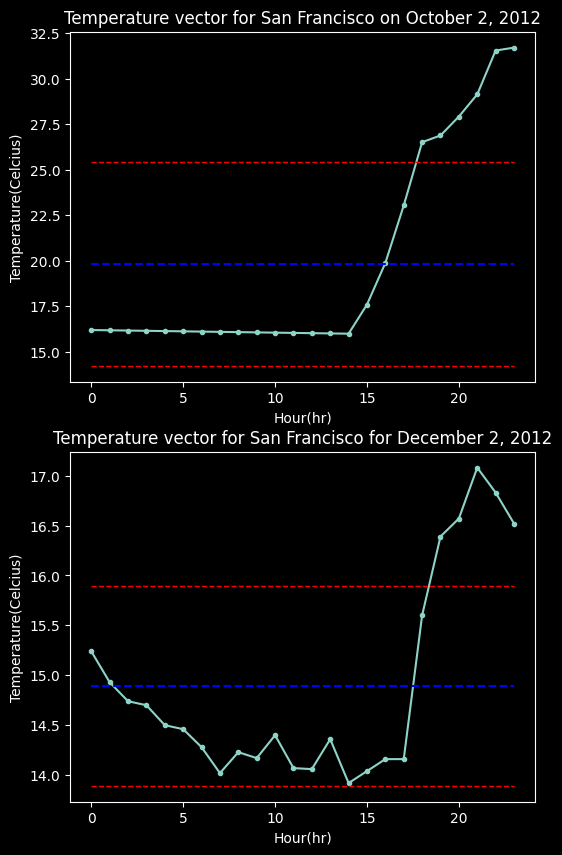

In [ ]:
# Temperature vector for San Francisco for 2012-10-02
t1 = df_temp['San Francisco']
t1 = t1['2012-10-02'].values
t1 = t1-273.15#convert from kelvin to celcius
#print(t1)
#df_temp['San Francisco].values will give the column of only values under sanfransico which is a named array
#a named array in python is called series(a named vector/ named array)
# Temperature vector for San Francisco for 2012-12-02
t2 = df_temp.iloc[df_temp.index.get_loc('2012-12-02'),df_temp.columns.get_loc('San Francisco')].values - 273.15
#print(t2)


# Plot temperature vectors for both days
fig1, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))
component_index=range(0,len(t1))
ax1.plot(component_index,t1,marker='.')
ax1.plot(component_index,[np.mean(t1)]*(len(t1)),color='blue',
         linestyle='dashed')
ax1.plot(component_index,[np.mean(t1)-np.std(t1)]*(len(t1)),color='red',
         linestyle='dashed', linewidth=1)
ax1.plot(component_index,[np.mean(t1)+np.std(t1)]*(len(t1)),color='red',
         linestyle='dashed', linewidth=1)
ax1.set_xlabel('Hour(hr)')
ax1.set_ylabel('Temperature(Celcius)')
ax1.set_title('Temperature vector for San Francisco on October 2, 2012')

ax2.plot(component_index,t2,marker='.')
ax2.plot(component_index,[np.mean(t2)]*(len(t2)),color='blue',
         linestyle='dashed')
ax2.plot(component_index,[np.mean(t2)-np.std(t2)]*(len(t2)),color='red',
         linestyle='dashed',linewidth=1)
ax2.plot(component_index,[np.mean(t2)+np.std(t2)]*(len(t2)),color='red',
         linestyle='dashed',linewidth=1)
ax2.set_xlabel('Hour(hr)')
ax2.set_ylabel('Temperature(Celcius)')
ax2.set_title('Temperature vector for San Francisco for December 2, 2012')


---

Mean-center the daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

[-3.62706017 -3.64143487 -3.65580958 -3.67018428 -3.68455898 -3.69893368
 -3.71330838 -3.72768308 -3.74205778 -3.75643248 -3.77080718 -3.78518188
 -3.79955658 -3.81393128 -3.82830598 -2.22830598  0.06169402  3.22169402
  6.70169402  7.07169402  8.11169402  9.33169402 11.74169402 11.90169402]


Text(0.5, 1.0, 'Mean-Centered Temperature vector for San Francisco for December 2, 2012')

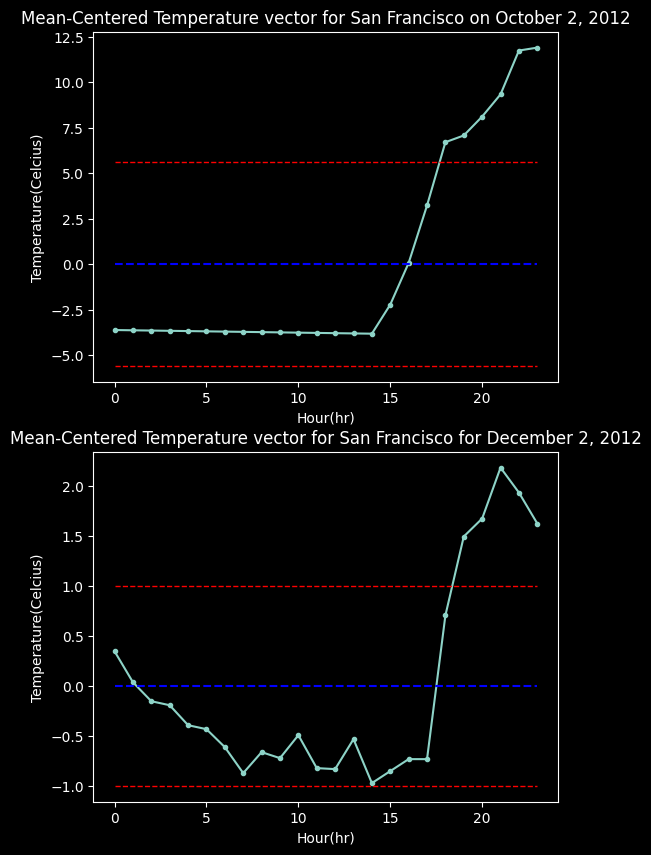

In [ ]:
# Mean-centered temperature vector for San Francisco for 2012-10-02
t1 = df_temp.iloc[df_temp.index.get_loc('2012-10-02'),df_temp.columns.get_loc('San Francisco')].values - 273.15
t1_mc = t1-np.mean(t1)
print(t1_mc)

# Mean-centered temperature vector for San Francisco for 2012-12-02
t2 = df_temp.iloc[df_temp.index.get_loc('2012-12-02'),df_temp.columns.get_loc('San Francisco')].values - 273.15
t2_mc = t2-np.mean(t2)
#print(t2_mc)

# Plot mean-centered temperature vectors for both days
fig2, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))
component_index=range(0,len(t1_mc))
ax1.plot(component_index,t1_mc,marker='.')
ax1.plot(component_index,[np.mean(t1_mc)]*(len(t1_mc)),color='blue',
         linestyle='dashed')
ax1.plot(component_index,[np.mean(t1_mc)-np.std(t1_mc)]*(len(t1_mc)),color='red',
         linestyle='dashed', linewidth=1)
ax1.plot(component_index,[np.mean(t1_mc)+np.std(t1_mc)]*(len(t1_mc)),color='red',
         linestyle='dashed', linewidth=1)
ax1.set_xlabel('Hour(hr)')
ax1.set_ylabel('Temperature(Celcius)')
ax1.set_title('Mean-Centered Temperature vector for San Francisco on October 2, 2012')

ax2.plot(component_index,t2_mc,marker='.')
ax2.plot(component_index,[np.mean(t2_mc)]*(len(t2_mc)),color='blue',
         linestyle='dashed')
ax2.plot(component_index,[np.mean(t2_mc)-np.std(t2_mc)]*(len(t2_mc)),color='red',
         linestyle='dashed',linewidth=1)
ax2.plot(component_index,[np.mean(t2_mc)+np.std(t2_mc)]*(len(t2_mc)),color='red',
         linestyle='dashed',linewidth=1)
ax2.set_xlabel('Hour(hr)')
ax2.set_ylabel('Temperature(Celcius)')
ax2.set_title('Mean-Centered Temperature vector for San Francisco for December 2, 2012')


---

Standardize daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

Text(0.5, 1.0, 'Mean-Centered Temperature vector for San Francisco for December 2, 2012')

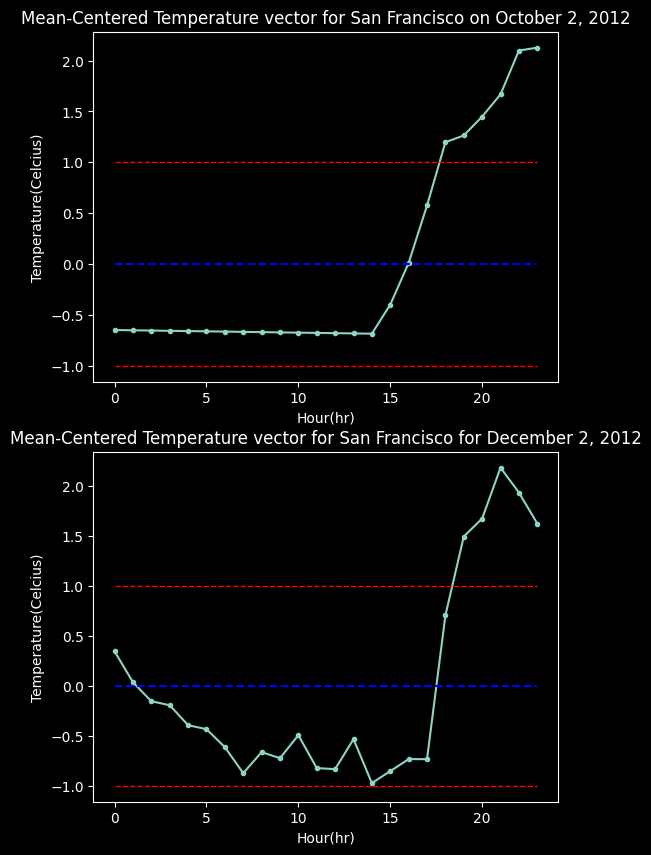

In [ ]:
# Standardized temperature vector for San Francisco for 2012-10-02
z1 = (t1-np.mean(t1))/np.std(t1)
#print(z1)

# Mean-centered temperature vector for San Francisco for 2012-12-02
z2 = (t2-np.mean(t2))/np.std(t2)
# print(z2)

# Plot standardized temperature vectors for both days
fig3, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))
component_index=range(0,len(z1))
ax1.plot(component_index,z1,marker='.')
ax1.plot(component_index,[np.mean(z1)]*(len(z1)),color='blue',
         linestyle='dashed')
ax1.plot(component_index,[np.mean(z1)-np.std(z1)]*(len(z1)),color='red',
         linestyle='dashed', linewidth=1)
ax1.plot(component_index,[np.mean(z1)+np.std(z1)]*(len(z1)),color='red',
         linestyle='dashed', linewidth=1)
ax1.set_xlabel('Hour(hr)')
ax1.set_ylabel('Temperature(Celcius)')
ax1.set_title('Mean-Centered Temperature vector for San Francisco on October 2, 2012')

ax2.plot(component_index,z2,marker='.')
ax2.plot(component_index,[np.mean(z2)]*(len(z2)),color='blue',
         linestyle='dashed')
ax2.plot(component_index,[np.mean(z2)-np.std(z2)]*(len(z2)),color='red',
         linestyle='dashed',linewidth=1)
ax2.plot(component_index,[np.mean(z2)+np.std(z2)]*(len(z2)),color='red',
         linestyle='dashed',linewidth=1)
ax2.set_xlabel('Hour(hr)')
ax2.set_ylabel('Temperature(Celcius)')
ax2.set_title('Mean-Centered Temperature vector for San Francisco for December 2, 2012')


---

Identify outliers in the daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012

---

In [ ]:
threshold=2.0
print(z1)
print(np.abs(z1)>= threshold)
print(np.where(np.abs(z1)>=threshold))

[-0.64832707 -0.65089651 -0.65346595 -0.65603539 -0.65860483 -0.66117427
 -0.6637437  -0.66631314 -0.66888258 -0.67145202 -0.67402146 -0.6765909
 -0.67916033 -0.68172977 -0.68429921 -0.39830359  0.01102764  0.57586898
  1.19790945  1.26404594  1.44994309  1.66801475  2.09879565  2.12739521]
[False False False False False False False False False False False False
 False False False False False False False False False False  True  True]
(array([22, 23]),)


In [ ]:
# Z-score threshold
threshold = 2.0#number of standard deviations beyond which samples are outliers
print(f'On 2012-10-02, outliers hours were: {np.where(np.abs(z1)>=threshold)}')
print(f'On 2012-12-02, outliers hours were: {np.where(np.abs(z2)>=threshold)}')

On 2012-10-02, outliers hours were: (array([22, 23]),)
On 2012-12-02, outliers hours were: (array([21]),)


---

Download popular stock prices data from Yahoo Finance for the range August 1, 2024 to August 1, 2025

---

In [3]:
stocks = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'JNJ', 'JPM', 'NVDA', 'AMZN', 'META', 'XOM']
dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
dfstock.columns#this dataframe is multi indexed/attributed column

/tmp/ipython-input-2746603529.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
[*********************100%***********************]  10 of 10 completed


MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close',  'JNJ'),
            ( 'Close',  'JPM'),
            ( 'Close', 'META'),
            ( 'Close', 'MSFT'),
            ( 'Close', 'NVDA'),
            ( 'Close', 'TSLA'),
            ( 'Close',  'XOM'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High',  'JNJ'),
            (  'High',  'JPM'),
            (  'High', 'META'),
            (  'High', 'MSFT'),
            (  'High', 'NVDA'),
            (  'High', 'TSLA'),
            (  'High',  'XOM'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low',  'JNJ'),
            (   'Low',  'JPM'),
            (   'Low', 'META'),
            (   'Low', 'MSFT'),
            (   'Low', 'NVDA'),
            (   'Low', 'TSLA'),
            (   'Low',  'XOM'),
            (  'Open', 'AAPL'),
        

In [4]:
dfstock.xs('Close', axis = 1, level = 0)

Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-01,217.097168,184.070007,171.626068,154.552963,203.392670,496.041473,413.256958,109.175514,216.860001,111.967537
2024-08-02,218.588501,167.899994,167.595398,157.802444,194.766373,486.474274,404.716644,107.236115,207.669998,111.900528
2024-08-05,208.059738,161.020004,159.872482,155.024048,190.619476,474.106628,391.499878,100.418274,198.880005,109.880409
2024-08-06,206.031525,161.929993,159.772980,152.832092,195.940018,492.403931,395.918671,104.217079,200.639999,109.296417
2024-08-07,208.606552,162.770004,159.981964,152.764771,195.998688,487.251617,394.749573,98.878769,191.759995,110.751648
...,...,...,...,...,...,...,...,...,...,...
2025-07-25,213.637543,231.440002,194.080002,167.073669,298.619995,712.679993,512.866943,173.500000,316.059998,109.382156
2025-07-28,213.807358,232.789993,193.419998,165.008820,298.279999,717.630005,511.658875,176.750000,325.589996,110.412575
2025-07-29,211.030502,231.009995,196.429993,166.885056,297.040009,700.000000,511.728760,175.509995,321.200012,111.839287


In [5]:
# Download stock price data of popular companies
stocks = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'JNJ', 'JPM', 'NVDA', 'AMZN', 'META', 'XOM']
dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
dfstock = dfstock.xs('Close', axis = 1, level = 0)#we select only closing prices of the stocks
dfstock.dropna(inplace = True)#drop all rows with nan values and update the dataframes and keep it in memory
dfstock.head()

/tmp/ipython-input-2952924309.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-01,217.097168,184.070007,171.626068,154.552963,203.392670,496.041473,413.256958,109.175514,216.860001,111.967537
2024-08-02,218.588501,167.899994,167.595398,157.802444,194.766373,486.474274,404.716644,107.236115,207.669998,111.900528
2024-08-05,208.059738,161.020004,159.872482,155.024048,190.619476,474.106628,391.499878,100.418274,198.880005,109.880409
2024-08-06,206.031525,161.929993,159.772980,152.832092,195.940018,492.403931,395.918671,104.217079,200.639999,109.296417
2024-08-07,208.606552,162.770004,159.981964,152.764771,195.998688,487.251617,394.749573,98.878769,191.759995,110.751648


---

Compute daily log returns as $\log\left(\frac{P_t}{P_{t-1}}\right)$ where $P_t$ is stock price today and $P_{t-1}$ is stock price yesterday. For each company, its log return values can be treated as a vector.

In [6]:
dfstock.shift(1)#moves row 1 ka values 1 step down and make row 1 ka elements as nan

Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-02,217.097168,184.070007,171.626068,154.552963,203.392670,496.041473,413.256958,109.175514,216.860001,111.967537
2024-08-05,218.588501,167.899994,167.595398,157.802444,194.766373,486.474274,404.716644,107.236115,207.669998,111.900528
2024-08-06,208.059738,161.020004,159.872482,155.024048,190.619476,474.106628,391.499878,100.418274,198.880005,109.880409
2024-08-07,206.031525,161.929993,159.772980,152.832092,195.940018,492.403931,395.918671,104.217079,200.639999,109.296417
...,...,...,...,...,...,...,...,...,...,...
2025-07-25,213.517670,232.229996,193.199997,168.324478,296.549988,714.799988,510.041534,173.740005,305.299988,109.768562
2025-07-28,213.637543,231.440002,194.080002,167.073669,298.619995,712.679993,512.866943,173.500000,316.059998,109.382156
2025-07-29,213.807358,232.789993,193.419998,165.008820,298.279999,717.630005,511.658875,176.750000,325.589996,110.412575


In [7]:
total_stock_log_returns=np.log(dfstock/dfstock.shift(1)).dropna()#computing the log returns, we use log returns coz its time additive
print(total_stock_log_returns)

Ticker          AAPL      AMZN      GOOG       JNJ       JPM      META  \
Date                                                                     
2024-08-02  0.006846 -0.091948 -0.023765  0.020807 -0.043338 -0.019476   
2024-08-05 -0.049366 -0.041840 -0.047176 -0.017764 -0.021522 -0.025752   
2024-08-06 -0.009796  0.005635 -0.000623 -0.014240  0.027529  0.037867   
2024-08-07  0.012421  0.005174  0.001307 -0.000441  0.000299 -0.010519   
2024-08-08  0.016496  0.018444  0.019040  0.008273  0.018099  0.041486   
...              ...       ...       ...       ...       ...       ...   
2025-07-25  0.000561 -0.003408  0.004545 -0.007459  0.006956 -0.002970   
2025-07-28  0.000795  0.005816 -0.003406 -0.012436 -0.001139  0.006922   
2025-07-29 -0.013073 -0.007676  0.015442  0.011306 -0.004166 -0.024874   
2025-07-30 -0.010563 -0.003556  0.005129 -0.005069  0.008682 -0.006866   
2025-07-31 -0.007105  0.016886 -0.023470 -0.015181 -0.011378  0.106634   

Ticker          MSFT      NVDA      T

In [8]:
# end_stock_prices=dfstock.iloc[-1,0:]#last row deets of all columns
# start_stock_prices=dfstock.iloc[0,0:]#first row deets of all columns

---

The risk or volatility associated with a stock can be quantified by the standard deviation of the log returns of that stock.

First, compute the volatility in the log returns of TSLA. Then, compute the volatility in the log returns of the all the stocks and plot them in a bar plot in descending order.

---

In [9]:
total_stock_log_returns.columns

Index(['AAPL', 'AMZN', 'GOOG', 'JNJ', 'JPM', 'META', 'MSFT', 'NVDA', 'TSLA',
       'XOM'],
      dtype='object', name='Ticker')

In [10]:
a=total_stock_log_returns['TSLA'].values
print(np.sqrt(np.dot(a-np.mean(a),a-np.mean(a))/len(a)))
print(np.std(a))

0.044917920810382664
0.04491792081038267


In [11]:
log_returns = np.log(dfstock / dfstock.shift(1)).dropna()#takes the original stock prices and divides by the shifted values, element by element divisions is done
volatilities = log_returns.std()#the std method does standard deviation element by element in a vector,
print(volatilities )

Ticker
AAPL    0.019815
AMZN    0.021501
GOOG    0.019647
JNJ     0.012190
JPM     0.017553
META    0.022929
MSFT    0.015702
NVDA    0.034123
TSLA    0.045008
XOM     0.015349
dtype: float64


Volatility in the log returns of TSLA = 0.04491792081038267
Volatility in the log returns of all stocks =
 Ticker
TSLA    0.045008
NVDA    0.034123
META    0.022929
AMZN    0.021501
AAPL    0.019815
GOOG    0.019647
JPM     0.017553
MSFT    0.015702
XOM     0.015349
JNJ     0.012190
dtype: float64


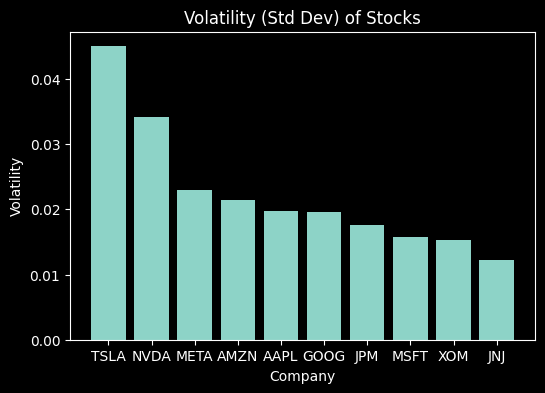

In [12]:
# Compute standard deviation a.k.a. volatility a.k.a. risk of TSLA
a=total_stock_log_returns['TSLA'].values
# a = dfstock.iloc[0:,dfstock.columns.get_loc('TSLA')].values
volatility_TSLA =np.std(a)
print(f'Volatility in the log returns of TSLA = {volatility_TSLA}')

# # #All stocks volatilities
log_returns = np.log(dfstock / dfstock.shift(1)).dropna()#takes the original stock prices and divides by the shifted values, element by element divisions is done
volatilities = log_returns.std()#the std function does standard deviation element by element in a vector,which is a column in a dataframe
volatilities=volatilities.sort_values(ascending=False)
print(f'Volatility in the log returns of all stocks =\n {volatilities}')

# # # # # Plot volatilities
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.bar(volatilities.index,volatilities.values)
ax.set_xlabel('Company')
ax.set_ylabel('Volatility')
ax.set_title('Volatility (Std Dev) of Stocks')
plt.show()


[Text(0, 0, 'TSLA'), Text(1, 0, 'NVDA'), Text(2, 0, 'META'), Text(3, 0, 'AMZN'), Text(4, 0, 'AAPL'), Text(5, 0, 'GOOG'), Text(6, 0, 'JPM'), Text(7, 0, 'MSFT'), Text(8, 0, 'XOM'), Text(9, 0, 'JNJ')]


/tmp/ipython-input-1348717829.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right') # 'ha' stands for horizontal alignment


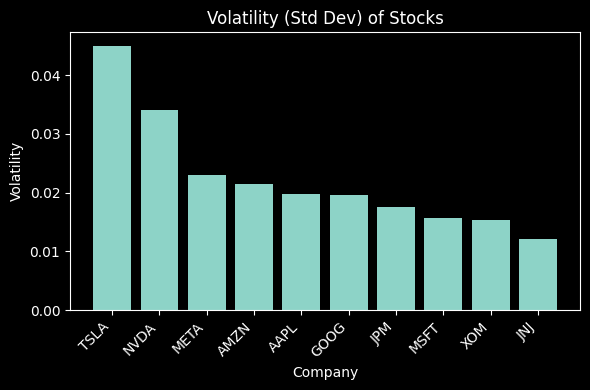

In [13]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.bar(volatilities.index,volatilities.values)
ax.set_xlabel('Company')
ax.set_ylabel('Volatility')
ax.set_title('Volatility (Std Dev) of Stocks')

# Get the current x-axis tick labels
labels = ax.get_xticklabels()
print(labels)
# Set the new x-axis tick labels with 45-degree rotation and right alignment
ax.set_xticklabels(labels, rotation=45, ha='right') # 'ha' stands for horizontal alignment

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [14]:
a=total_stock_log_returns['TSLA'].values
b=total_stock_log_returns['AMZN'].values
a_m=a-np.mean(a)
b_m=b-np.mean(b)
Covariance_val=np.cov(a_m,b_m)
print(Covariance_val)

[[0.00202576 0.00051373]
 [0.00051373 0.00046231]]


---

The covariance between two vectors is a measure of how the two vectors co-vary about their respective means. It is calculated as the average dot product of their mean-centered versions. If $\mathbf{a}_{mc}$ and $\mathbf{b}_{mc}$ represent the mean-centered versions of vectors $\mathbf{a}$ and $\mathbf{b},$ respectively, then the covariance between $\mathbf{a}$ and $\mathbf{b}$ is denoted and calculated as $$\text{cov}(\mathbf{a},\mathbf{b}) = \frac{1}{n}\times\left(\mathbf{a}_{mc}\cdot\mathbf{b}_{mc}\right).$$

In the component plot below of mean-centered heart rate and blood pressure values, it can be seen that the heart rates and blood pressures of the patients are co-varying similarly; that is, as the heart rate increases or decreases w.r.t. the average heart rate from one patient to another, the blood pressure also typically does the same w.r.t the average blood pressure.

![Covariance](https://1drv.ms/i/c/37720f927b6ddc34/IQTLFeKh-TzhSpSSm3swzRsaAarPH-HPV-j9tmHPV7eiDuY?width=375&height=580)

Calculate the covariance between the log returns of AAPL and AMZN. Does it indicate that those stocks co-vary similarly?

Make component plots of the log returns of AAPL and AMZN. Do you see the stocks co-varying similarly?

Modify the component plots to show the mean-centered log returns. Now do you see the stocks co-varying similarly?



---

Covariance between AAPL and AMZN log returns = [[0.00039262 0.00024667]
 [0.00024667 0.00046231]]
correlation is=[[1.         0.57899388]
 [0.57899388 1.        ]]


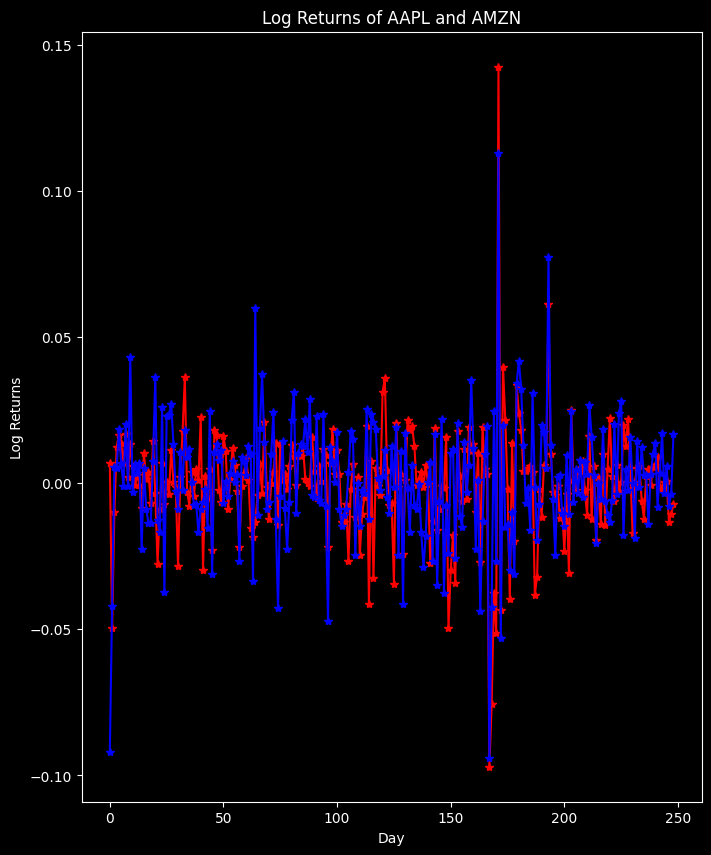

In [15]:
# Covariance between log returns of APPL and AMZN
a = total_stock_log_returns['AAPL'].values
a_mc = a-np.mean(a)
b = total_stock_log_returns['AMZN'].values
b_mc = b-np.mean(b)
cov = np.cov(a_mc,b_mc)
print(f'Covariance between AAPL and AMZN log returns = {cov}');
print(f"correlation is={np.corrcoef(a,b)}")
# Component plot of the log returns of AAPL and AMZN
fig, ax = plt.subplots(1, 1, figsize = (8, 10))
component_index = range(0, len(log_returns))
ax.plot(component_index, a, color = 'red', marker = '*')
ax.plot(component_index, b, color = 'blue', marker = '*')
ax.set_xlabel('Day')
ax.set_ylabel('Log Returns')
ax.set_title( 'Log Returns of AAPL and AMZN');

---

Compute the covariance between all pairs of log returns. The resulting matrix, denoted as $\pmb{\Sigma}$ is called the covariance matrix.

From that matrix, are you able to identify stocks that co-vary?

---

/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


[[0.01981464 0.01570589 0.01389194 0.0045481  0.01279165 0.01581012
  0.01324637 0.01729084 0.02068775 0.01106303]
 [0.01570589 0.02150131 0.0164972         nan 0.01450863 0.01907272
  0.01554127 0.02064565 0.02266557 0.00877934]
 [0.01389194 0.0164972  0.01964696        nan 0.01182197 0.01555533
  0.01291827 0.01843428 0.02155056 0.00760764]
 [0.0045481         nan        nan 0.01219015 0.00431023        nan
         nan        nan        nan 0.0062745 ]
 [0.01279165 0.01450863 0.01182197 0.00431023 0.01755321 0.01371847
  0.01111037 0.01577949 0.01907612 0.01030393]
 [0.01581012 0.01907272 0.01555533        nan 0.01371847 0.02292891
  0.01563172 0.02095113 0.02230969 0.00892756]
 [0.01324637 0.01554127 0.01291827        nan 0.01111037 0.01563172
  0.0157021  0.01829477 0.01811724 0.00591572]
 [0.01729084 0.02064565 0.01843428        nan 0.01577949 0.02095113
  0.01829477 0.0341232  0.02653582 0.01017236]
 [0.02068775 0.02266557 0.02155056        nan 0.01907612 0.02230969
  0.01811724

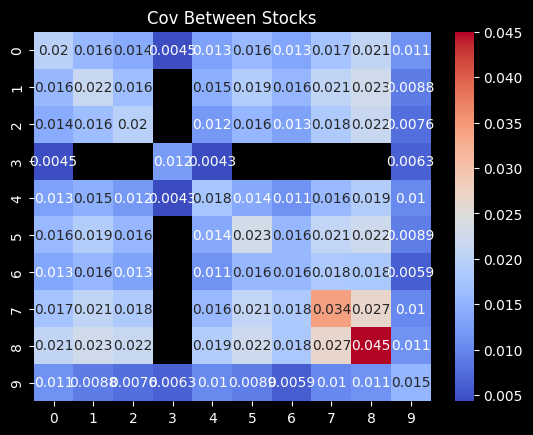

In [16]:
# Covariance matrix matrix of log returns
covmatrix = total_stock_log_returns.cov()#.cov() will give the covariance of each feature with every other feature
hehe=np.array(np.sqrt(covmatrix))
print(np.array(np.sqrt(covmatrix)))#The diagonal values of this matrix is the variance of every company as such
sns.heatmap(hehe,cmap='coolwarm',annot=True);
plt.title("Cov Between Stocks")
plt.show()#try and make it upper triangular or lower triangular matrix

---

The correlation coefficient between two vectors $\mathbf{a}$ and $\mathbf{c}$ is a normalized measure (between -1 and 1) of their covariance which is denoted and calculated as $$\text{cor}(\mathbf{a},\mathbf{b}) = \frac{\left(\mathbf{a}_{mc}\cdot\mathbf{b}_{mc}\right)}{\lVert \mathbf{a}_{mc}\rVert_2\lVert\mathbf{b}_{mc}\rVert_2}.$$ Note that the cauchy-Schwarz inequality guarantees that the above quantity is between -1 and 1.

If the correlation coefficient is close to 1, then as one vector's components increase, the other vectors components also increase typically along a straight line. If the correlation coefficient is close to -1, then as one vector's components increase, the other vectors components decrease typically along a straight line.

Compute the correlation coefficient between the log returns of AAPL and AMZN. Does it indicate that those stocks co-vary similarly?

Make a scatter plot of the log returns of AAPL and AMZN. Does the plot indicate that the two stocks co-vary similarly?

---

In [17]:
corr=np.corrcoef(a,b)
print(f'Covariance between AAPL and AMZN log returns = {np.cov(a,b)}')
print(f'Correlation coefficient between AAPL and AMZN log returns = {corr}')

Covariance between AAPL and AMZN log returns = [[0.00039262 0.00024667]
 [0.00024667 0.00046231]]
Correlation coefficient between AAPL and AMZN log returns = [[1.         0.57899388]
 [0.57899388 1.        ]]


Correlation coefficient between AAPL and AMZN log returns = [[1.         0.57899388]
 [0.57899388 1.        ]]


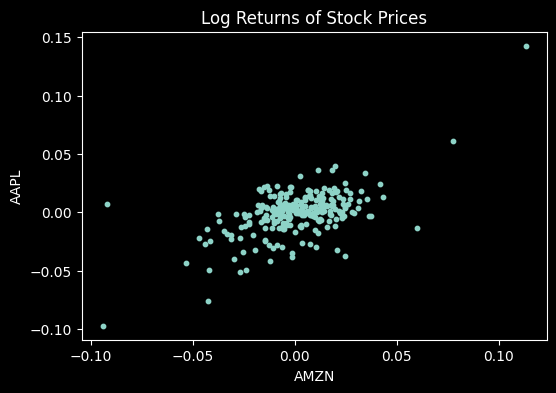

In [18]:
# Correlation between APPL and AMZN)
corr = np.corrcoef(a,b)
print(f'Correlation coefficient between AAPL and AMZN log returns = {corr}')

# Scatter plot of the log returns of AAPL and AMZN
fig, ax = plt.subplots(1, 1, figsize = (6, 4))#EACH POINT IS A DAY IN THIS PLOT
ax.scatter( total_stock_log_returns['AMZN'],  total_stock_log_returns['AAPL'], 10)
ax.set_xlabel('AMZN')
ax.set_ylabel('AAPL')
ax.set_title('Log Returns of Stock Prices');

---

Compute the correlation coefficient between all pairs of log returns and visualize the resulting correlation matrix. From that, identify stocks that co-vary typically.

---

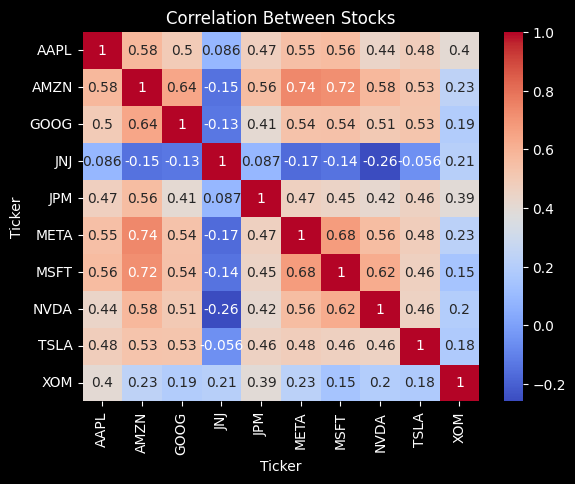

In [19]:
# Correlation matrix of log returns
corrmatrix = total_stock_log_returns.corr()
#print(corrmatrix)
sns.heatmap(corrmatrix,cmap='coolwarm',annot=True);
plt.title("Correlation Between Stocks")
plt.show()#try and make it upper triangular or lower triangular matrix

---

The average log return (or simply return) associated with a stock (AAPL) is simply the average or mean of the log returns of the that stock. For example, if we denote the log returns of AAPL as an $n$-vector $\mathbf{a},$ then its average log return in pen & paper can be written as $$\frac{1}{n}\times\left(a_1+a_2+\cdots+a_n\right) = \frac{1}{n}\times\left(\pmb{1}\cdot\mathbf{a}\right),$$ where $\pmb{1}$ is an $n$-vector whose elements are all equal to ones.

For a blended investment on the 10 stocks (called a portfolio) with weights that add up to 1 and represented as the vector $$\mathbf{w}=\begin{bmatrix}w_1\\w_2\\w_3\\\vdots\\w_{10}\end{bmatrix},$$
- the averate return can be shown to be $\mathbf{w}\cdot\mathbf{r},$ where $\mathbf{r}$ is the vector of average returns of all the 10 stocks;
- the overall risk (or simply risk) in the portfolio is $\mathbf{w}\cdot\left(\pmb{\Sigma}\mathbf{w}\right),$ which takes into account the individual volatility of each stock and their co-movement w.r.t. the other stocks.

Try to come up with a portfolio (that is, values for the components of the weights vector $\mathbf{w})$ that results in the best return-to-risk ratio. The best return-to-risk ratio is also referred to as the sharpe ratio.

---

In [20]:
# Optimizing portfolio
#w=[0,0,0,0.55,0.15,0,0.15,0.15,0,0.0]
#w=[0,0,0,0.55,0.1,0.05,0.15,0.15,0,0]#8.40
#w=[0,0,0,0.55,0.1,0.1,0.1,0.15,0,0]#8.5
#w=[0,0,0,0.55,0.1,0.15,0.08,0.13,0,0]
w=[0,0,0,0.55,0.14,0.17,0.08,0.06,0,0] #9.03
r=total_stock_log_returns.mean().values
np.dot(w,r)

np.float64(0.0008386630283837521)

In [21]:
w=[0,0,0,0.55,0.14,0.17,0.08,0.06,0,0] #9.19
r=total_stock_log_returns.mean().values
np.dot(w,r)

np.float64(0.0008386630283837521)

In [22]:

sum(w)

1.0

In [23]:
a=np.dot(np.array(total_stock_log_returns.cov()),w)

In [24]:
np.dot(w,a)

np.float64(9.122767184010879e-05)

In [25]:
np.dot(w,r)/np.dot(w,a)

np.float64(9.193077182257204)

In [26]:
total_stock_log_returns.mean()

,0
Ticker,
AAPL,-0.000185
AMZN,0.000966
GOOG,0.000468
JNJ,0.000227
JPM,0.001510
META,0.001784
MSFT,0.001019
NVDA,0.001960
TSLA,0.001413


In [32]:
import numpy as np

# Initial weights and data
w = np.array([0,0,0,0.55,0.14,0.17,0.08,0.06,0,0], dtype=float)
r = total_stock_log_returns.mean().values
Sigma = np.array(total_stock_log_returns.cov())

lr = 0.001   # smaller learning rate for stability
max_iter = 10000
tol = 1e-8

for i in range(max_iter):
    num = np.dot(w, r)
    den = np.dot(w, np.dot(Sigma, w))

    # Correct gradient formula
    grad = (r / den) - ((num * (2 * np.dot(Sigma, w))) / (den**2))

    # Update weights
    w_new = w + lr * grad

    # Project weights back to simplex (sum=1, non-negativity)
    w_new = np.maximum(w_new, 0)
    w_new = w_new / np.sum(w_new)

    # Check convergence
    if np.linalg.norm(w_new - w) < tol:
        break
    w = w_new

best_return = np.dot(w, r)
best_risk = np.dot(w, np.dot(Sigma, w))
sharpe_ratio = best_return / best_risk

print("Optimized Weights:", w)
print("Best Return:", best_return)
print("Best Risk:", best_risk)
print("Max Sharpe Ratio:", sharpe_ratio)


Optimized Weights: [0.         0.         0.         0.62080219 0.11709985 0.20164822
 0.         0.06044974 0.         0.        ]
Best Return: 0.0007959642058675148
Best Risk: 9.310295729167303e-05
Max Sharpe Ratio: 8.549290259104417


In [33]:
import numpy as np
from scipy.optimize import minimize

# ---------- Function Definitions ----------
def neg_sharpe(w, r, Sigma):
    ret = np.dot(w, r)
    risk = np.dot(w, np.dot(Sigma, w))
    return -(ret / risk)

def optimize_portfolio(r, Sigma, long_only=True):
    n = len(r)
    ones = np.ones(n)

    # Constraints
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = tuple((0, 1) for _ in range(n)) if long_only else tuple((-1, 1) for _ in range(n))

    # Initial guess: equal weights
    w0 = np.ones(n) / n

    result = minimize(
        neg_sharpe, w0, args=(r, Sigma),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints,
        options={'maxiter': 10000, 'ftol': 1e-12, 'disp': False}
    )

    if not result.success:
        raise ValueError("Optimization did not converge: ", result.message)

    # Extract optimal weights and Sharpe ratio
    w_opt = result.x
    best_return = np.dot(w_opt, r)
    best_risk = np.dot(w_opt, np.dot(Sigma, w_opt))
    sharpe_ratio = best_return / best_risk

    return w_opt, best_return, best_risk, sharpe_ratio

# ---------- Run Optimization ----------
w_opt, best_return, best_risk, sharpe_ratio = optimize_portfolio(r, Sigma, long_only=True)

print("\n--- Portfolio Optimization ---")
print("Optimal Long-Only Weights:", np.round(w_opt, 4))
print("Best Return:", round(best_return, 4))
print("Best Risk:", round(best_risk, 4))
print("Max Sharpe Ratio:", round(sharpe_ratio, 4))



--- Portfolio Optimization ---
Optimal Long-Only Weights: [0.     0.     0.     0.4526 0.206  0.1189 0.1995 0.023  0.     0.    ]
Best Return: 0.0009
Best Risk: 0.0001
Max Sharpe Ratio: 9.5679


In [34]:
from scipy.optimize import minimize

n = len(r)
ones = np.ones(n)

def neg_sharpe(w, r, Sigma):
    ret = np.dot(w, r)
    risk = np.dot(w, np.dot(Sigma, w))
    return -(ret / risk)  # Negative for maximization

constraints = (
    {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # sum of weights = 1
)
bounds = tuple((0, 1) for _ in range(n))  # long-only

w0 = np.ones(n) / n

result = minimize(neg_sharpe, w0, args=(r, Sigma), method='SLSQP',
                  bounds=bounds, constraints=constraints)

w_opt = result.x
best_return = np.dot(w_opt, r)
best_risk = np.dot(w_opt, np.dot(Sigma, w_opt))
sharpe_ratio = best_return / best_risk

print("Optimal Long-Only Weights:", w_opt)
print("Best Return:", best_return)
print("Best Risk:", best_risk)
print("Max Sharpe Ratio:", sharpe_ratio)


Optimal Long-Only Weights: [1.09259252e-13 6.22035210e-15 0.00000000e+00 4.52592090e-01
 2.05996939e-01 1.18883577e-01 1.99542844e-01 2.29845492e-02
 2.21471288e-14 0.00000000e+00]
Best Return: 0.00087429669960386
Best Risk: 9.137856927801118e-05
Max Sharpe Ratio: 9.567852796467953


In [35]:
import numpy as np
from scipy.optimize import minimize

# ---------- Function Definitions ----------
def neg_sharpe(w, r, Sigma):
    ret = np.dot(w, r)
    risk = np.dot(w, np.dot(Sigma, w))
    return -(ret / risk)

def optimize_portfolio(r, Sigma, long_only=True):
    n = len(r)
    ones = np.ones(n)

    # Constraints
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = tuple((0, 1) for _ in range(n)) if long_only else tuple((-1, 1) for _ in range(n))

    # Initial guess: equal weights
    w0 = np.ones(n) / n

    result = minimize(
        neg_sharpe, w0, args=(r, Sigma),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints,
        options={'maxiter': 10000, 'ftol': 1e-12, 'disp': False}
    )

    if not result.success:
        raise ValueError("Optimization did not converge: ", result.message)

    # Extract optimal weights and Sharpe ratio
    w_opt = result.x
    best_return = np.dot(w_opt, r)
    best_risk = np.dot(w_opt, np.dot(Sigma, w_opt))
    sharpe_ratio = best_return / best_risk

    return w_opt, best_return, best_risk, sharpe_ratio

# ---------- Run Optimization ----------
w_opt, best_return, best_risk, sharpe_ratio = optimize_portfolio(r, Sigma, long_only=True)

print("\n--- Portfolio Optimization ---")
print("Optimal Long-Only Weights:", np.round(w_opt, 4))
print("Best Return:", round(best_return, 4))
print("Best Risk:", round(best_risk, 4))
print("Max Sharpe Ratio:", round(sharpe_ratio, 4))



--- Portfolio Optimization ---
Optimal Long-Only Weights: [0.     0.     0.     0.4526 0.206  0.1189 0.1995 0.023  0.     0.    ]
Best Return: 0.0009
Best Risk: 0.0001
Max Sharpe Ratio: 9.5679


In [36]:
import torch

# Input data (replace these with your real values)
r = torch.tensor(r, dtype=torch.float32)                  # returns vector
Sigma = torch.tensor(Sigma, dtype=torch.float32)          # covariance matrix
n = len(r)

# Initialize weights (requires gradient for backprop)
w = torch.nn.Parameter(torch.ones(n) / n)

# Optimizer
optimizer = torch.optim.Adam([w], lr=0.01)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()

    # Ensure weights are positive and sum to 1 (softmax)
    w_normalized = torch.nn.functional.softmax(w, dim=0)

    # Calculate return and risk
    portfolio_return = torch.dot(w_normalized, r)
    portfolio_risk = torch.dot(w_normalized, torch.mv(Sigma, w_normalized))

    # Loss = negative Sharpe
    loss = -(portfolio_return / portfolio_risk)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Logging every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Sharpe = {-loss.item():.6f}")

# Final optimal weights
w_opt = torch.nn.functional.softmax(w, dim=0).detach().numpy()
final_sharpe = (-loss).item()

print("\n--- Optimization Complete ---")
print("Optimal Weights:", w_opt)
print("Max Sharpe Ratio:", final_sharpe)


Epoch 0: Sharpe = 3.778578
Epoch 1000: Sharpe = 9.524349
Epoch 2000: Sharpe = 9.554893
Epoch 3000: Sharpe = 9.562097
Epoch 4000: Sharpe = 9.564885
Epoch 5000: Sharpe = 9.566210
Epoch 6000: Sharpe = 9.566909
Epoch 7000: Sharpe = 9.567296
Epoch 8000: Sharpe = 9.567521
Epoch 9000: Sharpe = 9.567655

--- Optimization Complete ---
Optimal Weights: [2.1113042e-06 2.1889675e-06 3.8693902e-06 4.5256680e-01 2.0600303e-01
 1.1889460e-01 1.9954278e-01 2.2979511e-02 3.1482768e-06 1.9286113e-06]
Max Sharpe Ratio: 9.567731857299805
